In [8]:
import os
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import scanpy as sc
import tabulate
import umap
from importlib import reload

# locals
import utils as ut
reload(ut)

sc.settings.verbosity = 3 

In [2]:
dirPath = "/nfs/turbo/umms-indikar/shared/projects/spatial_transcriptomics/data/scRNAseq/"

adata = {}

for f in os.listdir(dirPath):
    if not f == "all":
        cond = f
        mtxPath = f"{dirPath}{f}"
        data = sc.read_10x_mtx(mtxPath, cache=True)
        data.var_names = [x.upper() for x in data.var_names] # uppercase gene names
        adata[cond] = data
        
        break
    
print("done")

done


In [4]:
min_genes = 500
min_cells = 1

for d, data in adata.items():
    print(d)
    sc.pp.filter_cells(data, min_genes=min_genes)
    sc.pp.filter_genes(data, min_cells=min_cells)
    sc.pp.normalize_total(data, target_sum=1e4) # Normalize each cell by total counts over all genes
    sc.pp.log1p(data) # Logarithmize data via `X = \log(X + 1)`,
    sc.pp.scale(data) # unit variance and zero mean

HFD14


In [9]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 5, 5

# the big choices
n_neighbors = 35
n_pcs = 40
resolution = 0.75

"""The parameter functions as a sort of threshold: communities should have a density of at least γ, 
while the density between communities should be lower than γ. 
Higher resolutions lead to more communities and lower resolutions lead to fewer communities, 
similarly to the resolution parameter for modularity."""

# clustering
for d, data in adata.items():
    
    # 1. project into low-dimensional space
    sc.tl.pca(data, 
              n_comps=n_pcs, 
              svd_solver='arpack')
    
    # 2. build neighborhood graph
    sc.pp.neighbors(data, 
                    n_neighbors=n_neighbors)
    
    # just for visualization purposes 
    sc.tl.umap(data)
    
    # modularity clustering via leiden algorithm
    sc.tl.leiden(data,
                 resolution=resolution)
    
print('done')

computing PCA
    with n_comps=40
    finished (0:00:02)
computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:16)
running Leiden clustering
    finished: found 15 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
done


/tmp/ipykernel_2023789/1971368868.py:6: RuntimeWarning: invalid value encountered in log
  plt.matshow(np.log(df))


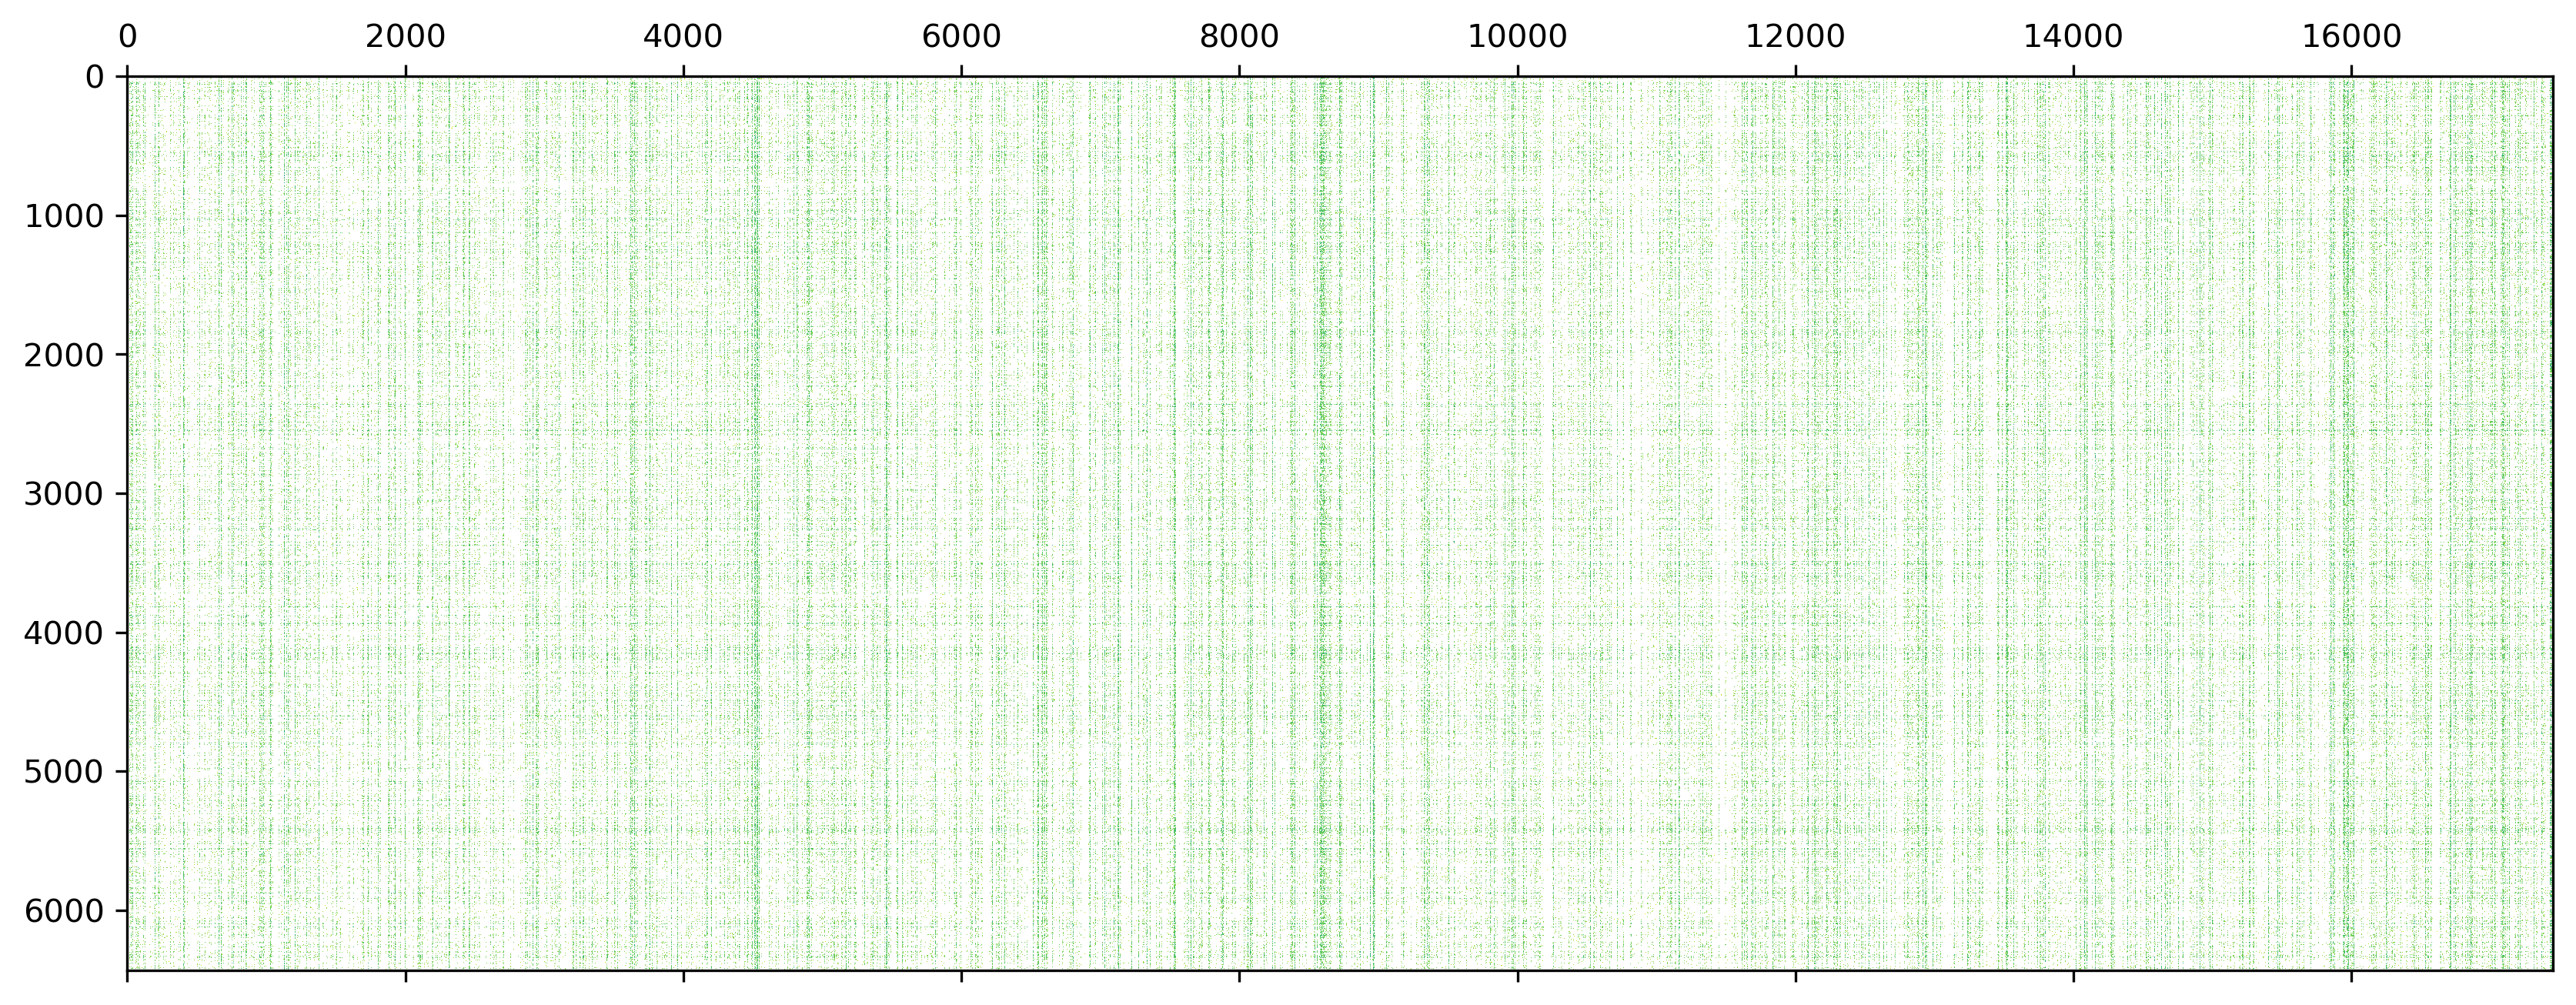

In [13]:
for d, data in adata.items():
    
    df = data.to_df()
    
    